# Building on the Mark-Recapture model

Let:

N = Number of animals in the population

n = Number of animals marked on the first visit

K = Number of animals captured on the second visit

k = Number of recaptured animals that were marked

Chapman estimation equation:

𝑁̂ 𝐶=(𝐾+1)(𝑛+1)𝑘+1−1

### Changes vs previous version:
* All constants moved from global variables to a class, as class properties
* The model is made into a function
* The "running dotses" visualization is made conditional (so we haven't deleted it completely), but it is now inactivated by default

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class Const:
    def __init__(self):
        self.N = 10
        self.nsteps = 100
        self.vmin = 0.01
        self.vmax = 0.05
        self.trap_size = 0.4
        self.trap_location = 'corner'
        self.death_rate = 0.01

In [7]:
def model(c, show_dots=False, ntrials=1):
    history = np.zeros((c.nsteps, ntrials))
    
    for itrial in range (ntrials):
        x = np.random.uniform(size=c.N)
        y = np.random.uniform(size=c.N)
        vx = np.random.uniform(size=c.N, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.N,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.N, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.N,low=0,high=2) - 1)
        
        if c.trap_location == 'corner':
            color = np.where(np.logical_and(x<c.trap_size, y<c.trap_size), 1, 0)
        else:
            color = np.where((x<0.5+c.trap_size/2)*(x>0.5-c.trap_size/2)*(
                y<0.5+c.trap_size/2)*(y>0.5-c.trap_size/2), 1, 0)
        n = np.sum(color)
        estimation = np.zeros(c.nsteps) # Main output variable
        
        # Plotting:
        if show_dots:
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()
            
        for t in range(c.nsteps):
            # Move animals around:
            x += vx
            y += vy
            
            # Reflect from the walls:
            vx = np.where(np.logical_or(x<0, x>1), -vx, vx)
            vy = np.where(np.logical_or(y<0, y>1), -vy, vy)
            
            is_replaced = np.random.uniform(size=c.N)<c.death_rate
            color[is_replaced] = 0 # These lose color- what does this mean???
            
            # Recapture
            if c.trap_location == 'corner':
                is_inside = (x<c.trap_size)*(y<c.trap_size)
            else:
                is_inside = (x<0.5+c.trap_size/2)*(x>0.5-c.trap_size/2)*(y<0.5+c.trap_size/2)*(y>0.5-c.trap_size/2)
            K = np.sum(is_inside)
            k = np.sum(is_inside*color)
            estimation[t] = (K+1)/(k+1)*(n+1)-1
            
            if show_dots: # Actual animation
                ax.clear()
                plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
                plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
                
        history[:,itrial] = estimation
    return np.mean(history, axis=1)
            

<IPython.core.display.Javascript object>


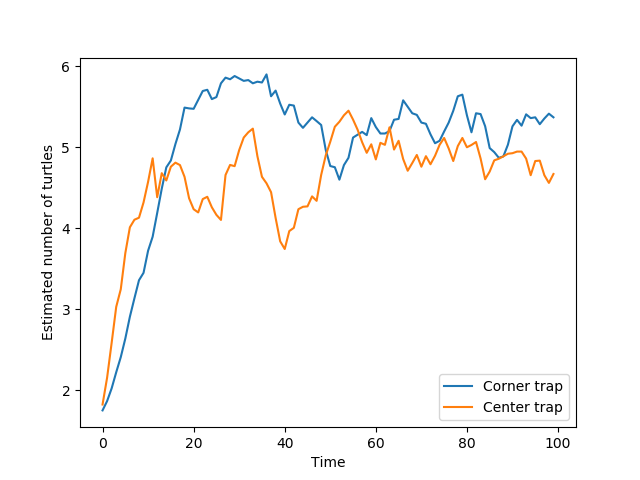

In [9]:
# Main program

c = Const()
curve1 = model(c, ntrials=100)
c.trap_location = 'center'
curve2 = model(c, ntrials = 100)

plt.figure()
plt.plot(curve1, label='Corner trap');
plt.plot(curve2, label='Center trap');
plt.xlabel('Time');
plt.ylabel('Estimated number of turtles');
plt.legend(loc='lower right');

<IPython.core.display.Javascript object>


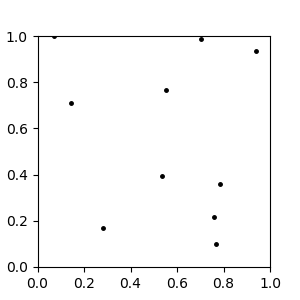

In [10]:
model(c, show_dots=True);